# Vertical mixing with numeric inputs

In the preceeding example, we looked at vertical mixing using an analytic diffusivity profile. The use of an analytic profile meant that we didn't have to interpolate between discrete data points when computing either the vertical eddy diffusivity or any of its derivatives. In more realisitic applications - for example, involving the outputs of a numerical model - this is not the case. Rather, we must interpolate between discrete data points to particle positions in order to obtain the data needed to compute changes in a particle's position. Mathematically, there are many different ways to interpolate between discrete data points, and the choice of interpolation scheme can have a marked effect on the model outputs. Furthermore, the result is also influenced by the number of particles used in the simulation, and the resolution of the vertical grid on which input data are defined. In this example, we investigate these dependencies using outputs from the [General Ocean Turbulence Model (*GOTM*)](https://github.com/gotm-model). The example draws some of its inspiration from the work of Grawe et al (2012), who assessed the merits of using numerical integration schemes of varying order.

The *GOTM* outputs used have been pre-generated and made available for download. In total, four *GOTM* output files are needed to run the experiments described here. These correspond to model runs that use a varying number of vertical layers, but in other ways are identical. The outputs can be [downloaded here](https://drive.google.com/open?id=15UX7Y9JnuLpnPAz700mzmzd917nTClxR). If you would like to run the code in this notebook interactively, download the data into a directory of your chooising. By default, the notebook will look for these files in the directory `${HOME}/data/pylag_doc`. To change this, simply update the *data_dir* path below.

In [1]:
import os

# Root directory for PyLag example input files
data_dir='{}/data/pylag_doc'.format(os.environ['HOME'])

## Background

In this example, we will compare outputs from the particle tracking model with those of a Eulerian model that simulates the vertical mixing of a single passive tracer or "dye" in 1D. For this, we use the DYE module from the [Framework for Aquatic Biogeochemical Models (*FABM*)](https://github.com/fabm-model), coupled to *GOTM*. We use a *GOTM* configuration for Station L4, which forms part of the [Western Channel Observatory (WCO)](https://www.westernchannelobservatory.org.uk/). The site has a depth of appriximately 50 m. We configure *FABM-GOTM* to release the dye at a point in space near to the ocean's surface and a time in Summer when the water column is stratified. Below, we plot the temporal evolution of the eddy diffusivity field and tracer concentration as simulated using two *GOTM* configurations: one using 20 vertical layers and a second using 200 vertical layers. The data are plotted for a single week at the end of June in 2010. When *GOTM* was run, data were saved every 30 minutes.

[]

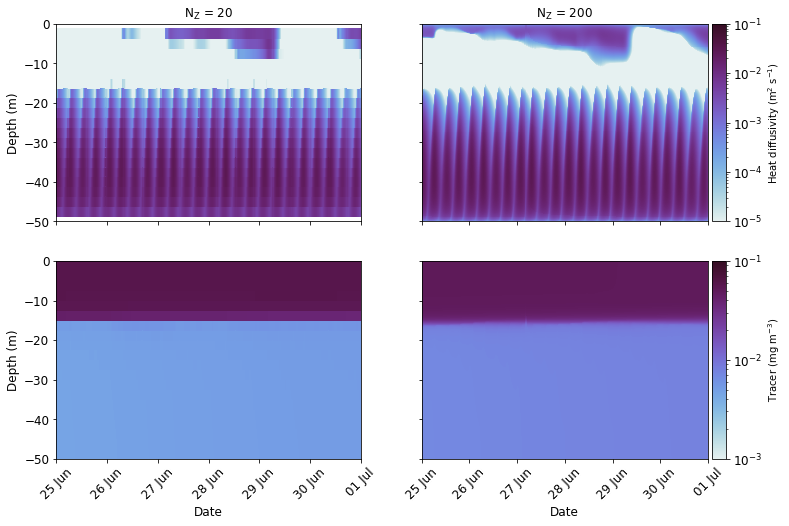

In [2]:
import matplotlib
from matplotlib import pyplot as plt
from matplotlib import colors
import matplotlib.dates as mdates
from datetime import datetime

from pylag.processing.plot import colourmap
from pylag.processing.plot import GOTMPlotter

# Ensure inline plotting
%matplotlib inline


def create_hovmoller_diagram(ax, gotm_file_name, var_name, vmin, vmax,
                              cmap='jet', add_colorbar=False, cb_label=None):
    """ Helper plotting function 

    """
    norm = colors.LogNorm(vmin=vmin, vmax=vmax)
    plotter = GOTMPlotter(gotm_file_name, fs=font_size, time_rounding=gotm_time_rounding)
    plotter.hovmoller(ax, var_name, add_colorbar=add_colorbar, cb_label=cb_label,
                      norm=norm, cmap=cmap)
    ax.set_xlim(date_start, date_end)
    ax.set_ylim(zmin, zmax)
    return

# Start and end dates
date_start = datetime(2010, 6, 25)
date_end = datetime(2010, 7, 1)

# Time rounding
gotm_time_rounding = 1800.

# Depth lims
zmin = -50.0
zmax = 0.0

# Create figure
font_size=12
figsize = (12, 8)
fig, ax_arr = plt.subplots(2, 2, figsize=figsize)
fig.set_facecolor('white')

for ax in ax_arr.ravel():
    plt.setp(ax.get_xticklabels(), fontsize=font_size)
    plt.setp(ax.get_yticklabels(), fontsize=font_size)

# Plot heat diffusivity for 20 z levels
file_name = '{}/gotm_l4_20_level.nc'.format(data_dir)
create_hovmoller_diagram(ax_arr[0, 0], file_name, 'nuh', vmin=1.e-5, vmax=0.1,
                          cmap=colourmap('nuh'), add_colorbar=False)
ax_arr[0, 0].set_title('N$_{\mathrm{Z}}$ = 20', fontsize=font_size)
ax_arr[0, 0].set_xlabel('', fontsize=font_size)
ax_arr[0, 0].set_ylabel('Depth (m)', fontsize=font_size)
ax_arr[0, 0].set_xticklabels([])

# Plot heat diffusivity for 200 z levels
file_name = '{}/gotm_l4_200_level.nc'.format(data_dir)
create_hovmoller_diagram(ax_arr[0, 1], file_name, 'nuh', vmin=1.e-5, vmax=0.1,
                          cmap=colourmap('nuh'), add_colorbar=True,
                          cb_label='Heat diffusivity (m$^{2}$ s$^{-1}$)')
ax_arr[0, 1].set_title('N$_{\mathrm{Z}}$ = 200', fontsize=font_size)
ax_arr[0, 1].set_xlabel('', fontsize=font_size)
ax_arr[0, 1].set_ylabel('', fontsize=font_size)
ax_arr[0, 1].set_xticklabels([])
ax_arr[0, 1].set_yticklabels([])

# Plot tracer_c for 20 z levels
file_name = '{}/gotm_l4_20_level.nc'.format(data_dir)
create_hovmoller_diagram(ax_arr[1, 0], file_name, 'tracer_c', vmin=0.001, vmax=0.1,
                          cmap=colourmap('tracer1_c'), add_colorbar=False)
ax_arr[1, 0].set_ylabel('Depth (m)', fontsize=font_size)
ax_arr[1, 0].set_xlabel('Date', fontsize=font_size)
ax_arr[1, 0].xaxis.set_major_locator(mdates.DayLocator())
ax_arr[1, 0].xaxis.set_major_formatter(mdates.DateFormatter('%d %b'))
for tick in ax_arr[1, 0].get_xticklabels():
    tick.set_rotation(45)

# Plot tracer_c for 200 z levels
file_name = '{}/gotm_l4_200_level.nc'.format(data_dir)
create_hovmoller_diagram(ax_arr[1, 1], file_name, 'tracer_c', vmin=0.001, vmax=0.1,
                          cmap=colourmap('tracer1_c'), add_colorbar=True,
                          cb_label='Tracer (mg m$^{-3}$)')
ax_arr[1, 1].set_ylabel('', fontsize=font_size)
ax_arr[1, 1].set_xlabel('Date', fontsize=font_size)
ax_arr[1, 1].xaxis.set_major_locator(mdates.DayLocator())
ax_arr[1, 1].xaxis.set_major_formatter(mdates.DateFormatter('%d %b'))
for tick in ax_arr[1, 1].get_xticklabels():
    tick.set_rotation(45)
labels = ax_arr[1, 1].set_yticklabels([])

It is clear from the top two panels that the water column is strongly stratified during this time, with a low diffusivity region separating top and bottom layers that are characterised by high levels of mixing. The periodicity evident in the bottom mixed layer reflects the action of the tides. In the bottom two figures, it can be seen the tracer exhibits a clear partitioning, with the majority persisting in the surface mixed layer while only small quantities have managed to mix down into deeper layers. The tracer was injected into the surface when the simulation started on 1st June 2010, at a time when the water column was also stratified. Over the month of the simulation, it has been effectively mixed within the surface layers, but under stratified conditions, it has not mixed throughout the water column.

Here, we will investigate how well the particle tracking model reproduces the tracer profile above and its temporal evolution. In so doing, we will investigate how differences between the two fields depend on a) the resolution of the vertical grid on which the input data are defined, b) the number of particles used in the particle release experiments, and c) the vertical interpolation scheme. For this, we will work with the 1D Milstein numerical approximation. For a similar investigation that uses higher order numerical approximations, the reader is referred to Grawe et al (2012).

For this example, we will run *PyLag* in a slightly different mode to the previous examples, which used analytic models encoded within mock `DataReaders` to drive *PyLag*. Here, we will launch a full *PyLag* simulation from the command line, with run confiuration options defined in a dedicated run configuration file; particle initial positions defined in a dedicated initial positions data file; and driving data read in from disk.

## Setting particle initial positions

We will create initial position files in which to record [particle initial positions](../documentation/getting_started.ipynb). These will be read in by *PyLag*, and used to create the initial particle seed in each run. In total, four initial position files are created for four different GOTM configurations. The GOTM configurations are distinguished by the number of vertical levels used. These were 20, 50, 100, and 200 vertical levels. In each case, particles are released from the middle of the top-most cell at the start of the simulation. The release location corresponds to the same point in space where the Eulerian tracer is released in the GOTM-FABM runs. By default, in order to keep the runs relatively short, just 100 particles are used in each simulation.

In [3]:
from pylag.processing.input import create_initial_positions_file_single_group

# Keep a copy of the cwd
cwd = os.getcwd()

# Initial properties (other than z) of test particles
group_id = 0
x_0 = 0.0
y_0 = 0.0

# Create a dictionary of (key, value) pairs in which the `keys' are the number 
# of z levels used in the GOTM simulation and the `values' are the depths of 
# the top most z layer. Depths are defined at the middle of the depth layer
# and are taken from the corresponding GOTM output file 
z_0s = {'20': -1.25, '50': -0.5, '100': -0.25, '200': -0.125}

# The number of particles in the particle seed
n_particles = 100

# Create a separate run directory and input file for each GOTM simulation
for n_z_levels, z_0 in z_0s.items():
    # Create run directory
    simulation_dir = '{}/simulations/gotm_{}_z_levels'.format(cwd, n_z_levels)
    try:
        os.makedirs(simulation_dir)
    except FileExistsError:
        pass

    # Create input sub-directory
    input_dir = '{}/input'.format(simulation_dir)
    try:
        os.makedirs(input_dir)
    except FileExistsError:
        pass
    
    # Crate the particle set
    x = []
    y = []
    z = []
    for i in range(n_particles):
        x.append(x_0)
        y.append(y_0)
        z.append(z_0)

    # Create the initial positions file
    file_name = '{}/initial_positions.dat'.format(input_dir)
    create_initial_positions_file_single_group(file_name, n_particles, group_id, x, y, z)

## Creating the run configuration files

When running applied examples, run configuration parameters are typically set in a [run configuration](../documentation/getting_started.ipynb) file. Examples of *PyLag* run configuration files can be found in PyLag's resources directory, which ships with the code. For this example, a template GOTM run configuration file has been provided. The file includes lots of comments, so we won't print it's full contents here. Instead, we will use configparser to look at a few settings specific to the example. First, we read in the file, then we print out some of the key options for the run.

In [4]:
import configparser

config_file_name = './configs/gotm_template.cfg'

cf = configparser.ConfigParser()
cf.read(config_file_name)

# Start time
print('Start time: {}'.format(cf.get('SIMULATION', 'start_datetime')))

# End time
print('End time: {}'.format(cf.get('SIMULATION', 'end_datetime')))

# We will do a single run, rather than an ensemble run
print('Number of particle releases: {}'.format(cf.get('SIMULATION', 'number_of_particle_releases')))

# Specify that we are working with FVCOM 
print('Model name: {}'.format(cf.get('OCEAN_CIRCULATION_MODEL', 'name')))

# Set the location of the grid metrics and input files
print('Data directory: {}'.format(cf.get('OCEAN_CIRCULATION_MODEL', 'data_dir')))
print('Path to grid metrics file: {}'.format(cf.get('OCEAN_CIRCULATION_MODEL', 'grid_metrics_file')))
print('File name stem of input files: {}'.format(cf.get('OCEAN_CIRCULATION_MODEL', 'data_file_stem')))
      
# Use the Milstein diffusive mixing scheme in 1D with a five second time step
print('Numerical method: {}'.format(cf.get('NUMERICS', 'num_method')))
print('Iterative method: {}'.format(cf.get('NUMERICS', 'iterative_method')))
print('Time step: {} s'.format(cf.get('NUMERICS', 'time_step_diff')))

# Use a linear interpolation scheme
print('Vertical interpolation: {}'.format(cf.get('OCEAN_CIRCULATION_MODEL', 'vertical_interpolation_scheme')))

Start time: 2010-06-01 00:00:00
End time: 2010-07-01 00:00:00
Number of particle releases: 1
Model name: GOTM
Data directory: 
Path to grid metrics file: 
File name stem of input files: 
Numerical method: standard
Iterative method: Diff_Milstein_1D
Time step: 5 s
Vertical interpolation: linear


From the above options, it can be seen we have not yet specified a directory within which the model can find *GOTM* output files. We will set this using `data_dir`, and use the file stem specific to each *GOTM* run to identify the required input file. We have not specified a [grid metrics](../documentation/overview.ipynb) file either. The grid metrics file is used to store information about the model grid, which saves computing the same information on the fly. However, it carries less importance with GOTM, which is a 1D model, and we can get away with simply pointing *PyLag* at a *GOTM* output file. All other paths are relative, and can be left as they are. It can be seen the model is run for a full month; however, we will only examine outputs from the final week of the simulation, as shown above. We will save the new config files in their respective simulation directories.

In [5]:
# Create a separate run configuration file for each GOTM simulation
for n_z_levels in z_0s.keys():
    
    cf.set('OCEAN_CIRCULATION_MODEL', 'data_dir', data_dir)

    data_file_stem = 'gotm_l4_{}'.format(n_z_levels)
    cf.set('OCEAN_CIRCULATION_MODEL', 'data_file_stem', data_file_stem)
    
    grid_metrics_file_name = '{}/gotm_l4_{}_level.nc'.format(data_dir, n_z_levels)
    cf.set('OCEAN_CIRCULATION_MODEL', 'grid_metrics_file', grid_metrics_file_name)

    simulation_dir = '{}/simulations/gotm_{}_z_levels'.format(cwd, n_z_levels)
    # Save a copy in the simulation directory
    with open("{}/pylag.cfg".format(simulation_dir), 'w') as config:
        cf.write(config)

## Running the model

With the run configuration files saved, we can now run the example. A small driver script has been provided for each simulation, which we will use here to launch *PyLag*. These launch *PyLag* in *MPI* mode, with run execution spread across four processors. In total four simulations will be run, one for each different number of vertical levels.

In [6]:
import subprocess

# Create a separate run configuration file for each GOTM simulation
for n_z_levels in z_0s.keys():

    # Change to the run directory and launch
    simulation_dir = '{}/simulations/gotm_{}_z_levels'.format(cwd, n_z_levels)
    
    # Change to the run directory
    os.chdir('{}'.format(simulation_dir))

    # Run the model
    var=!./run.sh

    # Return to the cwd
    os.chdir(cwd)

## Visualising the result

One of the goals here is to examine how closely the particle field corresponds to the Eulerian tracer field, and whether there is a dependency on the number of vertical layers used with *GOTM*. We will use a Gaussian Kernel Density Estimator (KDE) with reflecting boundary conditions to compute particle concentrations at the same points in space at which the Eulerian tracer is defined. Similar to the plot above, we do this for *GOTM* runs that used 20 and 200 vertical levels. In so doing, we implement another little helper function to assist with plotting the particle field. The particle and Eulerian tracer fields are plotted side by side.

[]

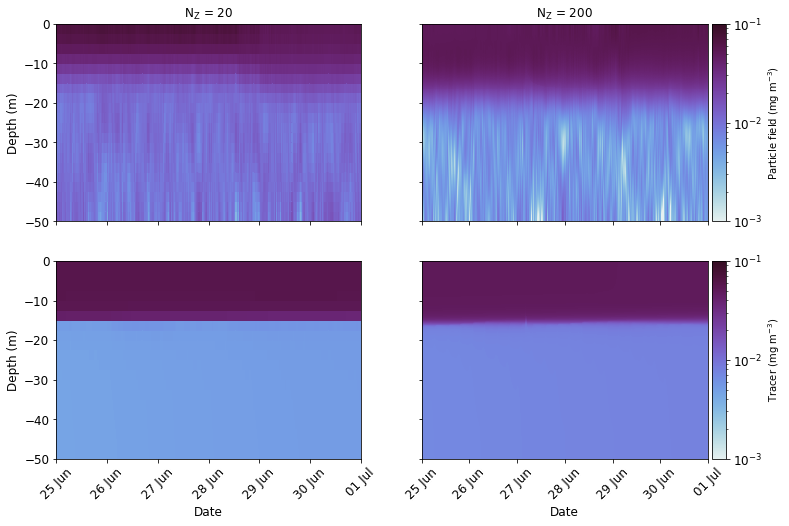

In [7]:
def create_particle_hovmoller_diagram(ax, gotm_file_name, pylag_file_names,
                                       vmin, vmax, cmap='jet', add_colorbar=False,
                                       cb_label=None):
    """ Helper plotting function 

    """
    norm = colors.LogNorm(vmin=vmin, vmax=vmax)
    plotter = GOTMPlotter(gotm_file_name, fs=font_size, time_rounding=gotm_time_rounding)
    plotter.hovmoller_particles(ax, pylag_file_names, date_start, date_end, pylag_time_rounding,
                                add_colorbar=add_colorbar, cb_label=cb_label,
                                norm=norm, cmap=cmap)
    ax.set_xlim(date_start, date_end)
    ax.set_ylim(zmin, zmax)
    return

# Time rounding
pylag_time_rounding = 1800.

# Create figure
font_size=12
figsize = (12, 8)
fig, ax_arr = plt.subplots(2, 2, figsize=figsize)
fig.set_facecolor('white')

for ax in ax_arr.ravel():
    plt.setp(ax.get_xticklabels(), fontsize=font_size)
    plt.setp(ax.get_yticklabels(), fontsize=font_size)

# Particle field for 20 z levels
gotm_file_name = '{}/gotm_l4_20_level.nc'.format(data_dir)
pylag_file_names = ['{}/simulations/gotm_20_z_levels/output/pylag_1.nc'.format(cwd)]
create_particle_hovmoller_diagram(ax_arr[0, 0], gotm_file_name, pylag_file_names,
                                   add_colorbar=False, vmin=0.001, vmax=0.1,
                                   cmap=colourmap('tracer1_c'))
ax_arr[0, 0].set_title('N$_{\mathrm{Z}}$ = 20', fontsize=font_size)
ax_arr[0, 0].set_xlabel('', fontsize=font_size)
ax_arr[0, 0].set_ylabel('Depth (m)', fontsize=font_size)
ax_arr[0, 0].set_xticklabels([])

# Particle field for 200 z levels
gotm_file_name = '{}/gotm_l4_200_level.nc'.format(data_dir)
pylag_file_names = ['{}/simulations/gotm_200_z_levels/output/pylag_1.nc'.format(cwd)]
create_particle_hovmoller_diagram(ax_arr[0, 1], gotm_file_name, pylag_file_names,
                                   vmin=0.001, vmax=0.1, cmap=colourmap('tracer1_c'),
                                   add_colorbar=True,
                                   cb_label='Particle field (mg m$^{-3}$)')
ax_arr[0, 1].set_title('N$_{\mathrm{Z}}$ = 200', fontsize=font_size)
ax_arr[0, 1].set_xlabel('', fontsize=font_size)
ax_arr[0, 1].set_ylabel('', fontsize=font_size)
ax_arr[0, 1].set_xticklabels([])
ax_arr[0, 1].set_yticklabels([])

# Plot tracer_c for 20 z levels
gotm_file_name = '{}/gotm_l4_20_level.nc'.format(data_dir)
create_hovmoller_diagram(ax_arr[1, 0], gotm_file_name, 'tracer_c', vmin=0.001, vmax=0.1,
                          cmap=colourmap('tracer1_c'), add_colorbar=False)
ax_arr[1, 0].set_ylabel('Depth (m)', fontsize=font_size)
ax_arr[1, 0].set_xlabel('Date', fontsize=font_size)
ax_arr[1, 0].xaxis.set_major_locator(mdates.DayLocator())
ax_arr[1, 0].xaxis.set_major_formatter(mdates.DateFormatter('%d %b'))
for tick in ax_arr[1, 0].get_xticklabels():
    tick.set_rotation(45)

# Plot tracer_c for 200 z levels
gotm_file_name = '{}/gotm_l4_200_level.nc'.format(data_dir)
create_hovmoller_diagram(ax_arr[1, 1], gotm_file_name, 'tracer_c', vmin=0.001, vmax=0.1,
                          cmap=colourmap('tracer1_c'), add_colorbar=True,
                          cb_label='Tracer (mg m$^{-3}$)')
ax_arr[1, 1].set_ylabel('', fontsize=font_size)
ax_arr[1, 1].set_xlabel('Date', fontsize=font_size)
ax_arr[1, 1].xaxis.set_major_locator(mdates.DayLocator())
ax_arr[1, 1].xaxis.set_major_formatter(mdates.DateFormatter('%d %b'))
for tick in ax_arr[1, 1].get_xticklabels():
    tick.set_rotation(45)
labels = ax_arr[1, 1].set_yticklabels([])

It should be pointed out that the above plot shows results for a single run with relatively few particles. As the model is stochastic, a second simulation would produce slightly different results. With this in mind, there are features within the figures that are worthy of comment. Firstly, the Eulerian tracer fields are not identical, which is to be expected - the two *GOTM* runs were performed using two different vertical grids. Second, in qualitative terms at least, there appears to be a better match between the particle and Eulerian fields in the run that used 200 vertical layers. In particular, the sharp gradient in the tracer field at a depth of around 15 m is not reproduced well in the run that used just 20 vertical layers. We can also compare the Eulerian and particle fields in more quantitative terms. Below, we compare the Eulerian and particle fields by computing the RMSE for all depth levels at six hour intervals over the last week of the simulation.

Text(0.5, 0, 'N$_{\\mathrm{Z}}$')

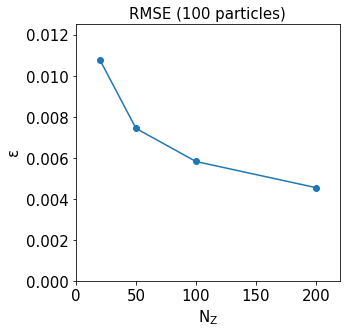

In [8]:
import numpy as np
from datetime import timedelta

from pylag.processing.plot import create_figure
from pylag.processing.gotm import get_rmse


# Create an array of dates on which to compare the eulerian and lagrangian models
# With a step of 6, the two fields are compared every six hours for the last week
# of the simulation, given the default start and end dates.
n_days = (date_end - date_start).days
hours_per_day = 24
step = 6
hours = range(0, (hours_per_day * n_days) + step, step)
dates = np.array([date_start + timedelta(hours=h) for h in hours])

# Compute RMSE
z_levels = []
epsilons = []
for n_z_levels in z_0s.keys():
    simulation_dir = '{}/simulations/gotm_{}_z_levels'.format(cwd, n_z_levels)
    gotm_file_name = '{}/gotm_l4_{}_level.nc'.format(data_dir, n_z_levels)
    pylag_file_names = ['{}/output/pylag_1.nc'.format(simulation_dir)]

    epsilon = get_rmse(gotm_file_name, 'tracer_c', pylag_file_names, dates,
                       gotm_time_rounding, pylag_time_rounding)
    
    z_levels.append(float(n_z_levels))
    epsilons.append(epsilon)

# Create figure
font_size = 15
fig, ax = create_figure(figure_size=(12., 12.), font_size=font_size)
    
# Plot
ax.plot(z_levels, epsilons, 'o-')
ax.set_xlim(0.0, 220)
ax.set_ylim(0.0, 0.0125)

ax.set_title('RMSE ({} particles)'.format(n_particles), fontsize=font_size)
ylabel = ax.set_ylabel('$\mathrm{\epsilon}$', fontsize=font_size)
xlabel = ax.set_xlabel('N$_{\mathrm{Z}}$', fontsize=font_size)

In the plot, we can see the RMSE halves as the number of vertical levels is increased from 20 to 200.  This result has relevance to work with 3D hydrodynamic models, where typical setups use between 20 and 50 vertical layers, depending on the application.

It is interesting to see how the RMSE plot changes with the number of particles used in each simulation. Try rerunning the model and plotting the outputs with 12 and 1000 particles in each simulation. Next, try rerunning the model using a `cubic_spline` vertical interpolation scheme.

<div class="alert alert-info">

**Note:**
    
Depending on your machine, simulations that use 1000 particles per run may take some time to complete as the model is computing 4 * 1000 particle trajectories over a month using a 5 second time step.

</div>

## Extending the analysis

The results of an experiment in which both the interpolation scheme and the numerical method were varied when investigating the relationship between the number of vertical levels and the RMSE are shown below.

![GOTM RMSE](figures/gotm_rmse.png)

The results are based on runs done using 1000 particles in ensemble simulations with 10 trials. Thus, each data point uses the pathlines of 10000 particles to compute the RMSE. It can be seen the Euler, Visser and Milstein methods all perform simularly. This is to be expected, as they all converge with the same order in the weak sense, and it is this property that we are testing here. What is also striking is the effect of putting a spline through the data points and using it for the interpolation. It can be seen that this markedly reduces the RMSE, especially for GOTM configurations that used just 10 or 50 vertical levels.

## References

Grawe, U., 2010. Implementation of high-order particle-tracking schemes in a water column model. Ocean Modelling. 36(1-2) 80-89. DOI: 10.1016/j.ocemod.2010.10.002.